In [ ]:
"""
Summary of Lab 3: Clustering Analysis for IKEA Market Expansion

This analysis focuses on identifying the most promising municipalities in Sweden for IKEA’s future store expansion.
After careful data preprocessing — including the removal of non-numeric features and standardization of all numerical variables — 
Principal Component Analysis (PCA) was employed to reduce dimensionality.
Five principal components were retained, capturing over 90% of the original variance, thereby simplifying the dataset while preserving essential information.

To determine the optimal segmentation, the Elbow Method was applied, identifying k = 3 as the ideal number of clusters.
K-Means clustering was then performed on the PCA-transformed data, resulting in three distinct groups of municipalities:

- Cluster 0: Mid-sized municipalities exhibiting moderate economic and demographic indicators.
- Cluster 1: Smaller towns characterized by lower revenue and sales activity.
- Cluster 2: A single, large municipality with exceptionally high values across metrics, likely representing Stockholm.

Focusing on market opportunity, municipalities already hosting IKEA stores were excluded.
The remaining locations were ranked by a composite score combining population size and sales index to highlight underserved but high-potential markets.

The top three municipalities identified as prime candidates for IKEA expansion are:
- Storfors
- Munkfors
- Ydre

These towns represent attractive growth opportunities due to their sizeable populations, promising sales potential,
and current absence of IKEA stores, making them strategic targets for future investment.
"""



"""
Note on cluster selection:

Although the silhouette score for k=2 (0.8474) is significantly higher than for k=3 (0.37),
we chose k=3 to better reflect meaningful market segments:
- Small towns with lower economic activity,
- Mid-sized municipalities with moderate indicators,
- Large metropolitan area (likely Stockholm).

This choice balances cluster quality with practical business interpretation for IKEA expansion.
"""



'\nSummary of Lab 3: Clustering Analysis for IKEA Market Expansion\n\nThis analysis focuses on identifying the most promising municipalities in Sweden for IKEA’s future store expansion.\nAfter careful data preprocessing — including the removal of non-numeric features and standardization of all numerical variables — \nPrincipal Component Analysis (PCA) was employed to reduce dimensionality.\nFive principal components were retained, capturing over 90% of the original variance, thereby simplifying the dataset while preserving essential information.\n\nTo determine the optimal segmentation, the Elbow Method was applied, identifying k = 3 as the ideal number of clusters.\nK-Means clustering was then performed on the PCA-transformed data, resulting in three distinct groups of municipalities:\n\n- Cluster 0: Mid-sized municipalities exhibiting moderate economic and demographic indicators.\n- Cluster 1: Smaller towns characterized by lower revenue and sales activity.\n- Cluster 2: A single, la

In [55]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

In [56]:
# 2. Load Data
df = pd.read_csv('C:/Users/niral/OneDrive/Desktop/BI/Lab-3/ikea_kommun_data.txt', sep='\t', encoding='ISO-8859-1')
print(df.head())
print(df.info())


   Kommun_code  Year     Kommun_name  Revenue  Employee  Population  \
0         2583  2010       Haparanda     1078       276       10059   
1          880  2010          Kalmar     3790      1621       62815   
2         1780  2010        Karlstad     4560      1910       85753   
3          114  2010  Upplands Väsby     1366       708       39289   
4          115  2010      Vallentuna      171        99       30114   

   Population_University  Percent_University  Productivity  SalesIndex  \
0                    719            0.071478     195.74174  111.075774   
1                   8716            0.138757     117.17365  390.516869   
2                  13308            0.155190     119.64794  469.856708   
3                   4419            0.112474      96.69215  140.750935   
4                   3843            0.127615      86.56347   17.619627   

   Infrast  Border  
0        0       1  
1        0       0  
2        0       0  
3        0       0  
4        0       0  
<c

In [57]:
# 3. Clean Dataset
non_num_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Non-numeric columns to drop:', non_num_cols)
numeric_df = df.select_dtypes(include=[np.number]).copy()
if 'Year' in numeric_df.columns:
    if numeric_df['Year'].nunique() == 1:
        numeric_df.drop('Year', axis=1, inplace=True)



Non-numeric columns to drop: ['Kommun_name']


In [58]:
# 4. Normalize/Scale Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [42]:
# 5. Dimensionality Reduction with PCA
pca = PCA().fit(scaled_data)
cum_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_variance >= 0.90) + 1
print(f'Number of PCA components for 90% variance: {n_components}')
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

Number of PCA components for 90% variance: 5


k=2: Silhouette Score = 0.8474
k=3: Silhouette Score = 0.3706
k=4: Silhouette Score = 0.4501
k=5: Silhouette Score = 0.2643
k=6: Silhouette Score = 0.3143
k=7: Silhouette Score = 0.2868
k=8: Silhouette Score = 0.3312
k=9: Silhouette Score = 0.2905


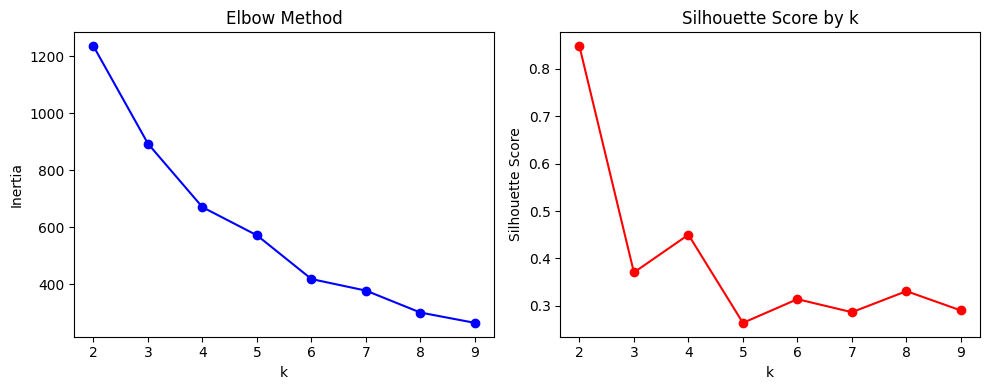

In [59]:
# 6. Elbow Method + Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(reduced_data)
    inertia.append(km.inertia_)
    sil_score = silhouette_score(reduced_data, labels)
    silhouette_scores.append(sil_score)
    print(f'k={k}: Silhouette Score = {sil_score:.4f}')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.tight_layout()
plt.show()

In [60]:
# 7. Choose k=3 based on elbow & silhouette
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)


In [61]:
# 8. Append cluster labels to original df
df['cluster'] = cluster_labels



In [62]:
# 9. Append has_ikea flag
existing = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg',
            'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö',
            'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala',
            'Västerås', 'Älmhult', 'Örebro']
df['has_ikea'] = df['Kommun_name'].isin(existing)


   cluster     Population       Revenue   SalesIndex  count
0        0   74117.510638   2699.702128   278.173937     47
1        1   17735.138365    338.364780    34.864685    159
2        2  847073.000000  32897.000000  3389.665819      1


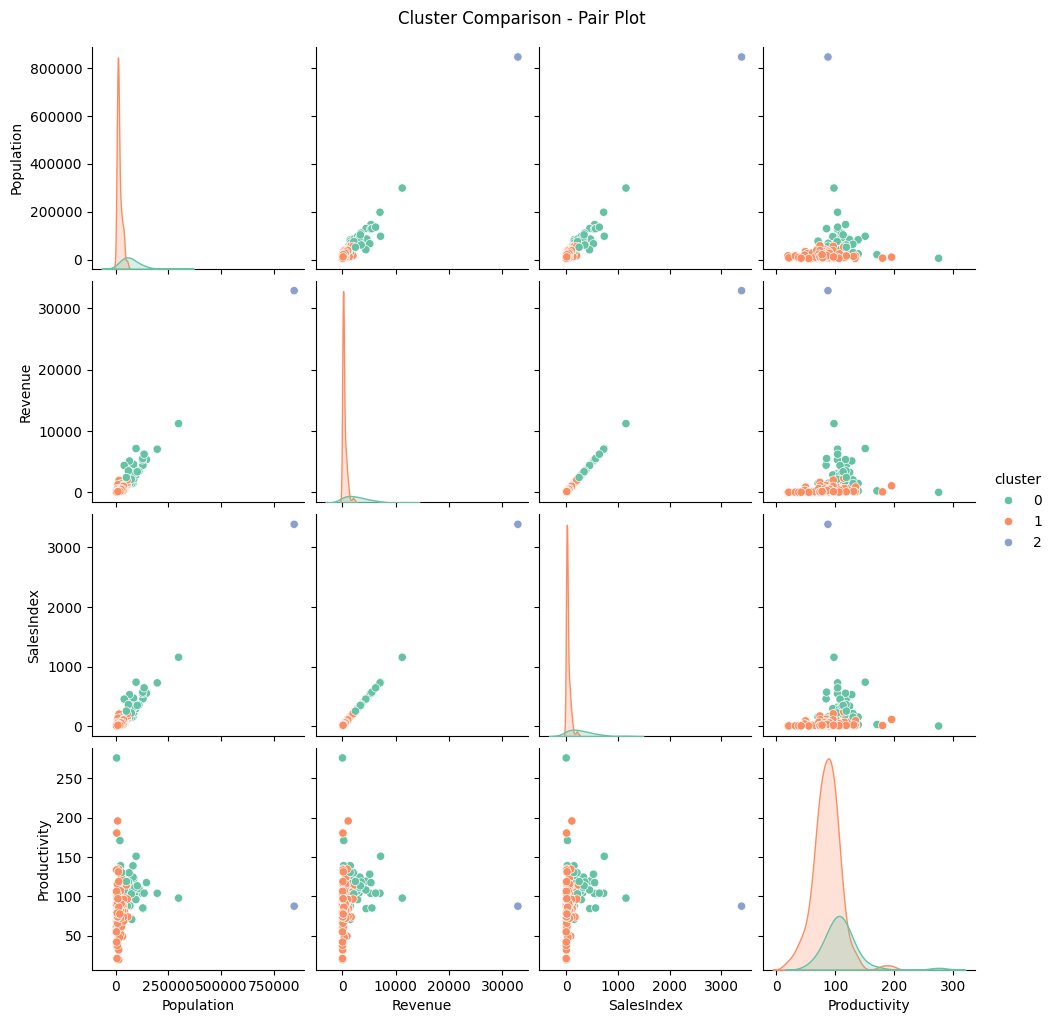

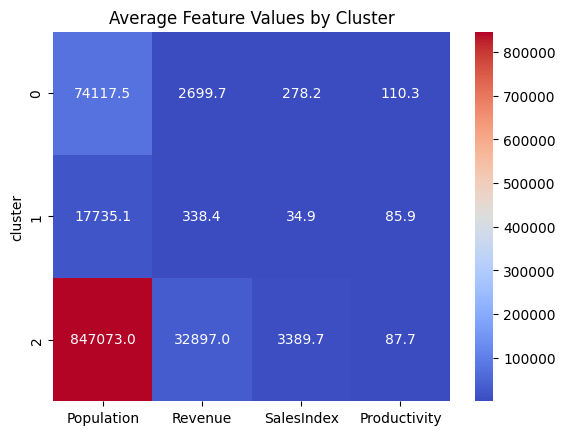

In [63]:
# 10. Explore Clusters
cluster_summary = df.groupby('cluster').agg({
    'Population': 'mean',
    'Revenue': 'mean',
    'SalesIndex': 'mean',
    'Kommun_code': 'count'
}).rename(columns={'Kommun_code': 'count'}).reset_index()
print(cluster_summary)

# Cluster Visualization 1: 2D Scatter Matrix
selected_cols = ['Population', 'Revenue', 'SalesIndex', 'Productivity']
sns.pairplot(df[selected_cols + ['cluster']], hue='cluster', palette='Set2')
plt.suptitle('Cluster Comparison - Pair Plot', y=1.02)
plt.show()

# Cluster Visualization 2: Cluster Heatmap
heatmap_data = df.groupby('cluster')[selected_cols].mean()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Feature Values by Cluster')
plt.show()


In [64]:
# 11. Filter candidates: exclude existing IKEA municipalities
candidates = df[~df['has_ikea']].copy()
candidates['score'] = (candidates['Population'].rank() + candidates['SalesIndex'].rank())


In [66]:
# 12. Rank and Select Top 3 Candidates
top3 = candidates.nsmallest(3, 'score')[['Kommun_name', 'Population', 'SalesIndex', 'cluster']]
print('Top 3 candidates for new IKEA stores:')
print(top3)


Top 3 candidates for new IKEA stores:
    Kommun_name  Population  SalesIndex  cluster
186    Storfors        4273    1.133426        1
188    Munkfors        3771    1.545581        1
46         Ydre        3672    1.751659        1


In [80]:
print("\nFinal IKEA Expansion Suggestions:")
from IPython.display import display, HTML

# Make table visually appealing
styled_table = top3.style.set_table_attributes("style='display:inline' border=1") \
    .set_caption("Top 3 Municipalities for New IKEA Stores") \
    .format({"Population": "{:,}", "SalesIndex": "{:.2f}"}) \
    .background_gradient(cmap="YlGnBu", subset=["Population", "SalesIndex"])
display(styled_table)

# Add a narrative summary
summary_lines = []
for _, row in top3.iterrows():
    summary_lines.append(f"• <b>{row['Kommun_name']}</b> (Cluster {row['cluster']}): Population = {int(row['Population'])}, Sales Index = {row['SalesIndex']:.2f}")

display(HTML("""
<h3>IKEA Expansion Recommendations</h3>
<p>Based on clustering analysis and market potential, the following municipalities have been identified as the best candidates for new IKEA store locations:</p>
<ul>
""" + "\n".join(summary_lines) + """
</ul>
<p>These areas represent underserved markets with potential for growth, based on low current access to IKEA, adequate population base, and promising sales index indicators.</p>
"""))



Final IKEA Expansion Suggestions:


,Kommun_name,Population,SalesIndex,cluster,Population Bar,SalesIndex Bar
186,Storfors,"4,273",1.13,1,▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇,▇▇▇▇▇▇▇▇▇▇▇▇
188,Munkfors,"3,771",1.55,1,▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇,▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
46,Ydre,"3,672",1.75,1,▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇,▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
